# IGM - MUEI
## Practice 2: Manipulating Images
---
In this practice we will learn how to manipulate images using Open CV in Python.
* Download images from the Internet.
* Reading them using Open CV.
* Conversion to different color spaces: RGB, CMYK and HSV.
* Spectrum graph calculations.
* Effect of decimation (*subsampling*) in different color models.
* Calculation of error metrics: MSE, PSNR, and SSIM.
---

Import all required modules and libraries

In [13]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

print(cv.__version__) # Prints out the version of Open CV

4.1.2


Open CV does not support to read from a file descriptor, hence the image file is first downloaded from the Internet to the local disk. 

curl or similar are alternatives but they are not available in all environments.

In [0]:
# Some more imports
import requests
from io import BytesIO
import os.path

# URL and separated filename
filename = 'sail.tif'
url = 'http://links.uwaterloo.ca/Repository/TIF/' + filename

# Downloads the file to a local file with the same name
# if the file does not exist
if not os.path.exists(filename):
  #! curl -O {url}
  buffer = requests.get(url, allow_redirects=True);
  open(filename, 'wb').write(buffer.content);


## Open CV color models
### RGB vs BGR

The downloaded image is readed with Open CV (as a NumPy array) and plotted. Notice that the order of the color components is BGR, i.e., they are reversed with respect to what plt.imshow() expects.

Type of img1:  <class 'numpy.ndarray'>


(512, 768, 3)

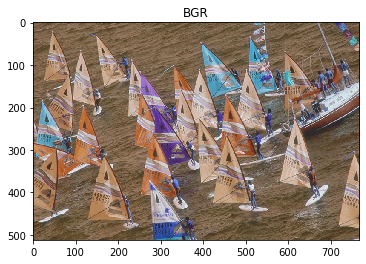

In [15]:
img1 = cv.imread(filename, cv.IMREAD_COLOR)
plt.imshow(img1)
plt.title('BGR')
print(f"Type of img1: ", type(img1))
img1.shape

A new image, identical to the previous one is obtained, but now the color components are in the same order as expected by plt.imshow().

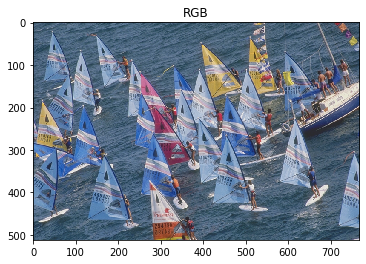

In [16]:
img2=np.zeros(img1.shape,np.uint8) # New array with the same dimensions as img1
img2[:,:,0]=img1[:,:,2] # Red
img2[:,:,1]=img1[:,:,1] # Green
img2[:,:,2]=img1[:,:,0] # Blue
plt.imshow(img2)
plt.title('RGB')
plt.show()

There is a very handy function to do such conversions between color models in Open CV:

```
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
```



### YCrCb and HSV color models

Obtain equivalent images but using different color models: YCrCb (instead of YCbCr) and HSV.

In [0]:
imgYCrCb=cv.cvtColor(img1, cv.COLOR_BGR2YCrCb)
imgHSV = cv.cvtColor(img1, cv.COLOR_BGR2HSV)



### Plotting individual color components
Plot color components in grayscale.

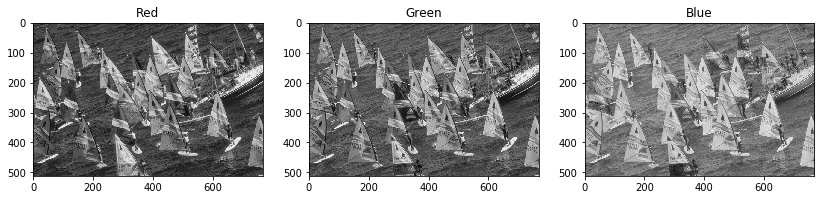

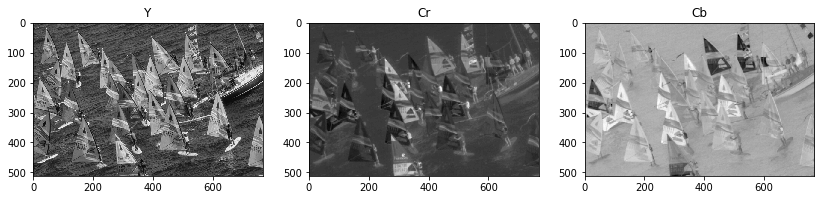

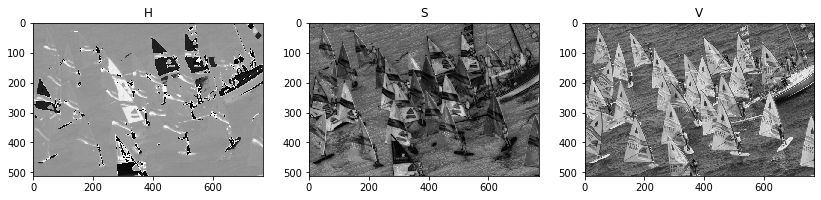

In [18]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.imshow(img1[:,:,2],cmap="gray")
plt.title('Red')
plt.subplot(1,3,2)
plt.imshow(img1[:,:,1],cmap="gray")
plt.title('Green')
plt.subplot(1,3,3)
plt.imshow(img1[:,:,0],cmap="gray")
plt.title('Blue')

plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.imshow(imgYCrCb[:,:,0],cmap="gray")
plt.title('Y')
plt.subplot(1,3,2)
plt.imshow(imgYCrCb[:,:,1],cmap="gray")
plt.title('Cr')
plt.subplot(1,3,3)
plt.imshow(imgYCrCb[:,:,2],cmap="gray")
plt.title('Cb')
plt.show()

plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.imshow(imgHSV[:,:,0],cmap="gray")
plt.title('H')
plt.subplot(1,3,2)
plt.imshow(imgHSV[:,:,1],cmap="gray")
plt.title('S')
plt.subplot(1,3,3)
plt.imshow(imgHSV[:,:,2],cmap="gray")
plt.title('V')
plt.show()

**Excercise 1.** Add the histograms and analyze the results. For each color model, analyze how all the perceived information from the original image is distributed among the three components.





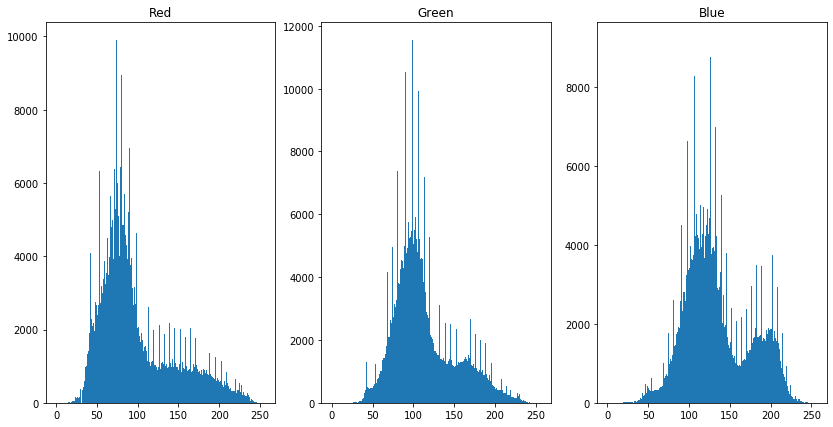

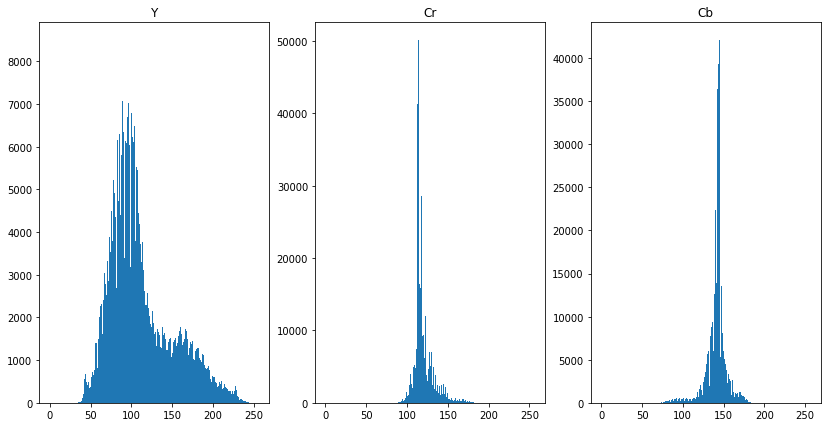

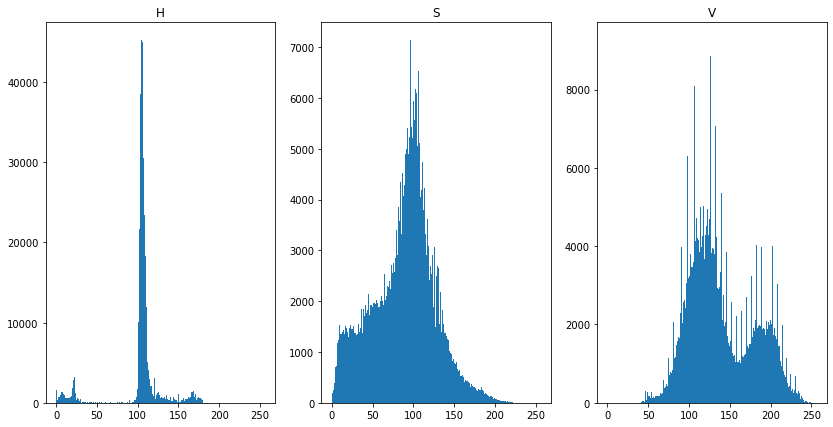

In [19]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.hist(img1[:,:,2].ravel(),256,[0,256])
plt.title('Red')
plt.subplot(1,3,2)
plt.hist(img1[:,:,1].ravel(),256,[0,256])
plt.title('Green')
plt.subplot(1,3,3)
plt.hist(img1[:,:,0].ravel(),256,[0,256])
plt.title('Blue')

plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.hist(imgYCrCb[:,:,0].ravel(),256,[0,256])
plt.title('Y')
plt.subplot(1,3,2)
plt.hist(imgYCrCb[:,:,1].ravel(),256,[0,256])
plt.title('Cr')
plt.subplot(1,3,3)
plt.hist(imgYCrCb[:,:,2].ravel(),256,[0,256])
plt.title('Cb')
plt.show()

plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.hist(imgHSV[:,:,0].ravel(),256,[0,256])
plt.title('H')
plt.subplot(1,3,2)
plt.hist(imgHSV[:,:,1].ravel(),256,[0,256])
plt.title('S')
plt.subplot(1,3,3)
plt.hist(imgHSV[:,:,2].ravel(),256,[0,256])
plt.title('V')
plt.show()

## Subsampling

### 4:2:0


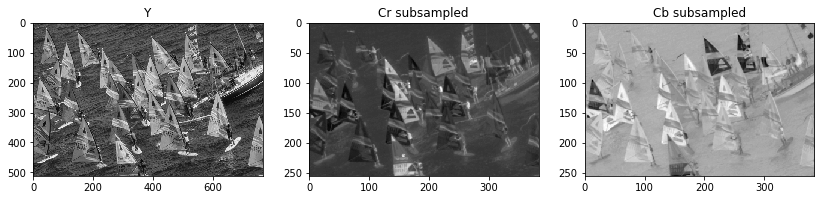

imgYCrCb.shape=(512, 768, 3)
CrSubsampled=(256, 384)


In [20]:
CrFiltered=cv.boxFilter(imgYCrCb[:,:,1],ddepth=-1,ksize=(2,2))
CbFiltered=cv.boxFilter(imgYCrCb[:,:,2],ddepth=-1,ksize=(2,2))
verticalSubsamplingFactor = 2
horizontalSubsamplingFactor = 2
CrSubsampled=CrFiltered[::verticalSubsamplingFactor,::horizontalSubsamplingFactor]
CbSubsampled=CbFiltered[::verticalSubsamplingFactor,::horizontalSubsamplingFactor]

plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.imshow(imgYCrCb[:,:,0],cmap="gray")
plt.title('Y')
plt.subplot(1,3,2)
plt.imshow(CrSubsampled,cmap="gray")
plt.title('Cr subsampled')
plt.subplot(1,3,3)
plt.imshow(CbSubsampled,cmap="gray")
plt.title('Cb subsampled')
plt.show()

print(f'imgYCrCb.shape={imgYCrCb.shape}')
print(f'CrSubsampled={CrSubsampled.shape}')

**Exercise 2.** Add the corresponding histograms and analyze the results with respect to the original Cr and Cb components.

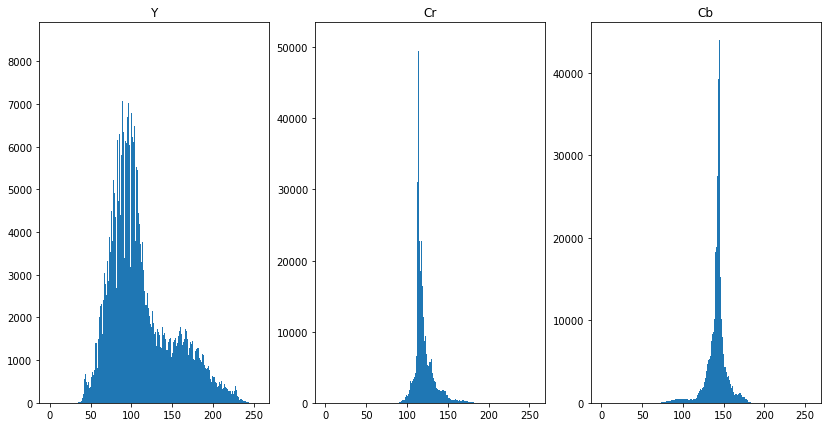

In [21]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.subplot(1,3,1)
plt.hist(imgYCrCb[:,:,0].ravel(),256,[0,256])
plt.title('Y')
plt.subplot(1,3,2)
plt.hist(CrFiltered.ravel(),256,[0,256])
plt.title('Cr')
plt.subplot(1,3,3)
plt.hist(CbFiltered.ravel(),256,[0,256])
plt.title('Cb')
plt.show()

The problem of the implementation above is that the subsampled components do not have the same number of pixels as the original one. This is a problem to compute error metrics (e.g., MSE or SSIM). 

![Subsampling factors](https://miro.medium.com/proxy/0*aGaA4jh96Om_9WrK)
For 4:2:0 subsampling (see [Chroma Subsampling in NumPy](https://medium.com/@sddkal/chroma-subsampling-in-numpy-47bf2bb5af83)):
* Vertically: every second element equals to the element above itself.
* Horizontally: every second element equals to the element on its left side.

**Exercise 3.** Implement subsampling with a factor of 4:2:0 but keeping the same resolution as in the original image for Cb and Cr components.
* Plot the original image on top of the subsampled one.

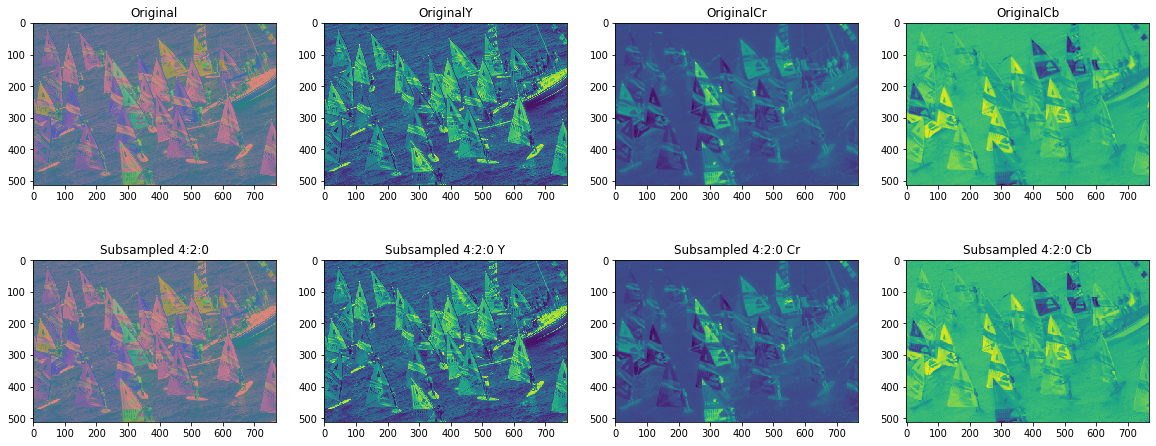

imgYCrCb.shape=(512, 768, 3)
CrSubsampled.shape=(512, 768)
CBSubsampled.shape=(512, 768)


In [22]:
imgYCrCbSubSampled420 = imgYCrCb.copy() # 4:2:0
imgYCrCbSubSampled420[1::2, :] = imgYCrCbSubSampled420[::2, :] 
# Vertically, every second element equals to element above itself.
imgYCrCbSubSampled420[:, 1::2] = imgYCrCbSubSampled420[:, ::2] 
# Horizontally, every second element equals to the element on its left side.

fig = plt.gcf()
fig.set_size_inches(20, 8)
####### ORIGINAL ######
plt.subplot(2,4,1)
plt.imshow(imgYCrCb)
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(imgYCrCb[:,:,0])
plt.title('OriginalY')
plt.subplot(2,4,3)
plt.imshow(imgYCrCb[:,:,1])
plt.title('OriginalCr')
plt.subplot(2,4,4)
plt.imshow(imgYCrCb[:,:,2])
plt.title('OriginalCb')
####### SUBSAMPLED 420 ######
plt.subplot(2,4,5)
plt.imshow(imgYCrCbSubSampled420)
plt.title('Subsampled 4:2:0')
plt.subplot(2,4,6)
plt.imshow(imgYCrCbSubSampled420[:,:,0])
plt.title('Subsampled 4:2:0 Y')
plt.subplot(2,4,7)
plt.imshow(imgYCrCbSubSampled420[:,:,1])
plt.title('Subsampled 4:2:0 Cr')
plt.subplot(2,4,8)
plt.imshow(imgYCrCbSubSampled420[:,:,2])
plt.title('Subsampled 4:2:0 Cb')
plt.show()



print(f'imgYCrCb.shape={imgYCrCb.shape}')
print(f'CrSubsampled.shape={imgYCrCbSubSampled420[:,:,1].shape}')
print(f'CBSubsampled.shape={imgYCrCbSubSampled420[:,:,2].shape}')

**Exercise 4.** Implement also subsampling factors 4:2:2 and 4:1:0 and analize the results.

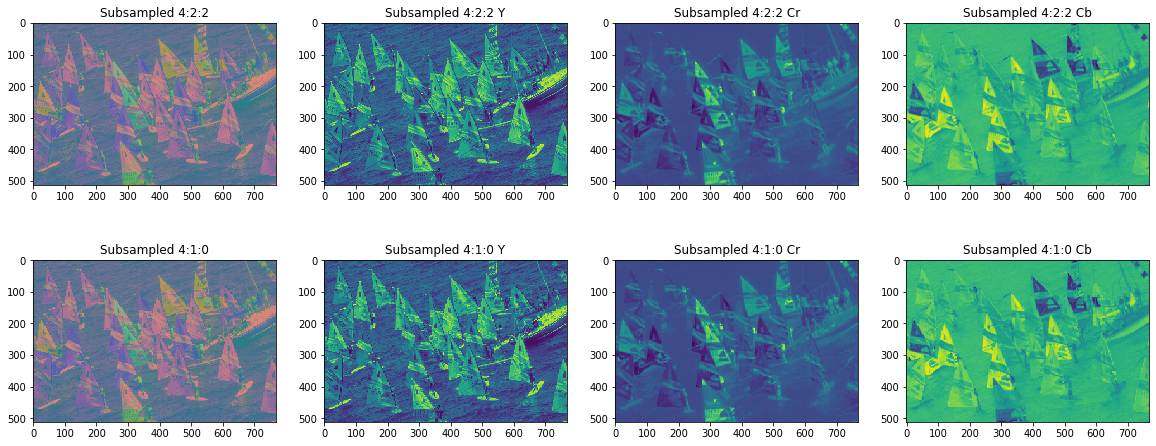

imgYCrCb.shape=(512, 768, 3)
CrSubsampled420Cr.shape=(512, 768)
CBSubsampled420Cb.shape=(512, 768)
CrSubsampled422Cr.shape=(512, 768)
CBSubsampled422Cb.shape=(512, 768)
CrSubsampled410Cr.shape=(512, 768)
CBSubsampled410Cb.shape=(512, 768)


In [23]:
imgYCrCbSubSampled422 = imgYCrCb.copy()
imgYCrCbSubSampled422[:, 1::2] = imgYCrCbSubSampled422[:, ::2] # 4:2:2

imgYCrCbSubSampled410 = imgYCrCb.copy()
imgYCrCbSubSampled410[:, 1::4] = imgYCrCbSubSampled410[:, ::4] # 4:1:0
imgYCrCbSubSampled410[:, 2::4] = imgYCrCbSubSampled410[:, ::4] # 4:1:0
imgYCrCbSubSampled410[:, 3::4] = imgYCrCbSubSampled410[:, ::4] # 4:1:0
imgYCrCbSubSampled410[1::2, :] = imgYCrCbSubSampled410[::2, :] # 4:1:0

fig = plt.gcf()
fig.set_size_inches(20, 8)
####### SUBSAMPLED 422 ######
plt.subplot(2,4,1)
plt.imshow(imgYCrCbSubSampled422)
plt.title('Subsampled 4:2:2')
plt.subplot(2,4,2)
plt.imshow(imgYCrCbSubSampled422[:,:,0])
plt.title('Subsampled 4:2:2 Y')
plt.subplot(2,4,3)
plt.imshow(imgYCrCbSubSampled422[:,:,1])
plt.title('Subsampled 4:2:2 Cr')
plt.subplot(2,4,4)
plt.imshow(imgYCrCbSubSampled422[:,:,2])
plt.title('Subsampled 4:2:2 Cb')
####### SUBSAMPLED 410 ######
plt.subplot(2,4,5)
plt.imshow(imgYCrCbSubSampled410)
plt.title('Subsampled 4:1:0')
plt.subplot(2,4,6)
plt.imshow(imgYCrCbSubSampled410[:,:,0])
plt.title('Subsampled 4:1:0 Y')
plt.subplot(2,4,7)
plt.imshow(imgYCrCbSubSampled410[:,:,1])
plt.title('Subsampled 4:1:0 Cr')
plt.subplot(2,4,8)
plt.imshow(imgYCrCbSubSampled410[:,:,2])
plt.title('Subsampled 4:1:0 Cb')
plt.show()

print(f'imgYCrCb.shape={imgYCrCb.shape}')
print(f'CrSubsampled420Cr.shape={imgYCrCbSubSampled420[:,:,1].shape}')
print(f'CBSubsampled420Cb.shape={imgYCrCbSubSampled420[:,:,2].shape}')
print(f'CrSubsampled422Cr.shape={imgYCrCbSubSampled422[:,:,1].shape}')
print(f'CBSubsampled422Cb.shape={imgYCrCbSubSampled422[:,:,2].shape}')
print(f'CrSubsampled410Cr.shape={imgYCrCbSubSampled410[:,:,1].shape}')
print(f'CBSubsampled410Cb.shape={imgYCrCbSubSampled410[:,:,2].shape}')

## Error metrics

* $\mathrm{MSE} = \frac{1}{M\cdot N}\sum_{m=0}^{M-1} \sum_{n=0}^{N-1}\left[I_\text{original}(m, n) - I_\text{reconstructed}(m, n)\right]^2$

* $\mathrm{SNR}[\text{dB}] = 10\log_{10}\frac{\frac{1}{M\cdot N}\sum_{m=0}^{M-1} \sum_{n=0}^{N-1} I_\text{original}^2(m, n)}{\mathrm{MSE}}$

* $\mathrm{PSNR} = 20\log_{10}\frac{\text{MAX}_I}{\sqrt{\mathrm{MSE}}} = 10\log_{10}\frac{\text{MAX}_I^2}{\mathrm{MSE}}, \text{MAX}_I = 2^B-1
$

Implementations of these metrics are available on [scikit-image](https://scikit-image.org/), and also for the [SSIM](https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html).

**Exercise 5.** Compute the three considered error metrics and the SSIM for the two images in Exercises 3 and 4. Show the results on a [table](https://colab.research.google.com/drive/1oXkzlM0lPbDC8saNRUnkGOjpKCTiDHvM#scrollTo=1qqZ2wiOwTbp) and analyze them.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37:

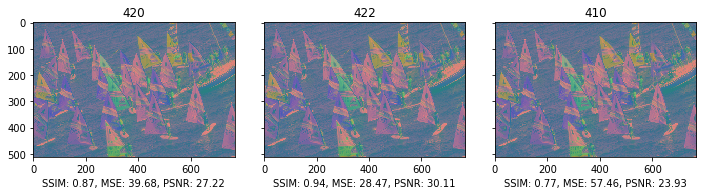

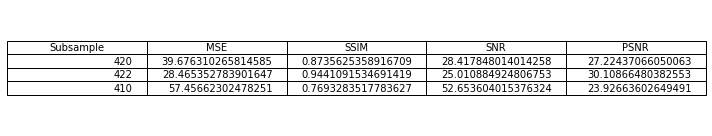

In [24]:
#!pip install scikit-image --upgrade
from skimage import img_as_float
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_psnr as psnr
imgYCrCb = img_as_float(imgYCrCb)
imgYCrCbSubSampled420float = img_as_float(imgYCrCbSubSampled420)
imgYCrCbSubSampled422float = img_as_float(imgYCrCbSubSampled422)
imgYCrCbSubSampled410float = img_as_float(imgYCrCbSubSampled410)
rows, cols, channels = imgYCrCb.shape

def mse(x, y):
    return np.linalg.norm(x - y)

def snr(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()


snr_original = snr(imgYCrCb)

mse_420 = mse(imgYCrCb, imgYCrCbSubSampled420float)
psnr_420 = psnr(imgYCrCb, imgYCrCbSubSampled420float, data_range=imgYCrCbSubSampled420float.max() - imgYCrCbSubSampled420float.min())
ssim_420 = ssim(imgYCrCb, imgYCrCbSubSampled420float, data_range=imgYCrCbSubSampled420float.max() - imgYCrCbSubSampled420float.min(), multichannel=True)
snr_420 = mse(snr_original, snr(imgYCrCbSubSampled420float))

mse_422 = mse(imgYCrCb, imgYCrCbSubSampled422float)
psnr_422 = psnr(imgYCrCb, imgYCrCbSubSampled422float, data_range=imgYCrCbSubSampled422float.max() - imgYCrCbSubSampled422float.min())
ssim_422 = ssim(imgYCrCb, imgYCrCbSubSampled422float, data_range=imgYCrCbSubSampled422float.max() - imgYCrCbSubSampled422float.min(), multichannel=True)
snr_422 = mse(snr_original, snr(imgYCrCbSubSampled422float))

mse_410 = mse(imgYCrCb, imgYCrCbSubSampled410float)
psnr_410 = psnr(imgYCrCb, imgYCrCbSubSampled410float, data_range=imgYCrCbSubSampled410float.max() - imgYCrCbSubSampled410float.min())
ssim_410 = ssim(imgYCrCb, imgYCrCbSubSampled410float, data_range=imgYCrCbSubSampled410float.max() - imgYCrCbSubSampled410float.min(), multichannel=True)
snr_410 = mse(snr_original, snr(imgYCrCbSubSampled410float))

label = 'SSIM: %.2f, MSE: %.2f, PSNR: %.2f'

ax[0].imshow(imgYCrCbSubSampled420)
ax[0].set_xlabel(label % (ssim_420, mse_420, psnr_420))
ax[0].set_title('420')

ax[1].imshow(imgYCrCbSubSampled422)
ax[1].set_xlabel(label % (ssim_422, mse_422, psnr_422))
ax[1].set_title('422')

ax[2].imshow(imgYCrCbSubSampled410)
ax[2].set_xlabel(label % (ssim_410, mse_410, psnr_410))
ax[2].set_title('410')

plt.tight_layout()
plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(10, 2)
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
data = np.array([["420", mse_420, ssim_420, snr_420, psnr_420], ["422", mse_422, ssim_422, snr_422, psnr_422], ["410", mse_410, ssim_410, snr_410, psnr_410]])
collabel=("Subsample","MSE", "SSIM", "SNR", "PSNR")
ax.table(cellText=data, colLabels=collabel, loc='center')
fig.tight_layout()

plt.show()